In [9]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='3'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [10]:
y_list = np.load('../y_list.npy')

In [14]:
t_start = time.time()
mel_layer = Spectrogram.CQT1992(sr=22050, n_bins=84, bins_per_octave=24, fmin=55, center=True)
time_used = time.time()-t_start
print(time_used)

12.688679218292236


In [ ]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [6]:
timing = []

for e in range(5):
    t_start = time.time()
    spec = mel_layer(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

3.828517436981201
0.0011680126190185547
0.0009250640869140625
0.0009596347808837891
0.0008616447448730469


In [7]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.7664863586425781
std =  1.5310155426167908


In [8]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch_GPU'

In [9]:
data.to_csv('CQT_torch_GPU')

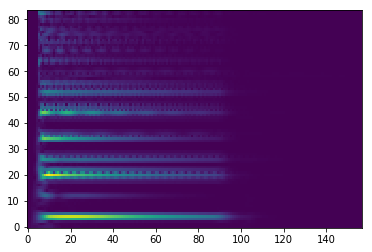

In [10]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')

# 2010

In [3]:
t_start = time.time()
mel_layer = Spectrogram.CQT2010(sr=44100, n_bins=84, bins_per_octave=24, fmin=220, center=True)
time_used = time.time()-t_start
print(time_used)

7.516581773757935


In [4]:
timing = []

for e in range(5):
    t_start = time.time()
    spec2010 = mel_layer(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

NameError: name 'y_torch' is not defined

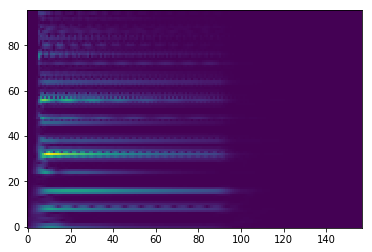

In [21]:
plt.imshow(spec2010[0].cpu().numpy(), aspect='auto', origin='lower')

In [22]:
np.array_equal(spec[0].cpu().numpy(), spec2010[0].cpu().numpy())

True